# Logistic Regression

Implementation of Logistic Regression on the Diabetes dataset.

In [57]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [34]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [39]:
X = data.data
y = data.target
y = np.array([0 if yi < 170 else 1 for yi in y])

print(X.shape, y.shape)

(442, 10) (442,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353,) (89, 10) (89,)


In [49]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [51]:
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Testing Accuracy: ", lr.score(X_test, y_test))

Training Accuracy:  0.7337110481586402
Testing Accuracy:  0.7415730337078652


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        56
           1       1.00      0.30      0.47        33

    accuracy                           0.74        89
   macro avg       0.85      0.65      0.65        89
weighted avg       0.82      0.74      0.69        89



[[200  11]
 [ 83  59]]


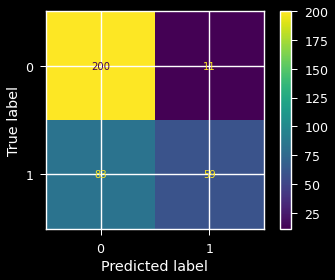

In [59]:
print(confusion_matrix(y_train, y_pred_train))
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)

[[56  0]
 [23 10]]


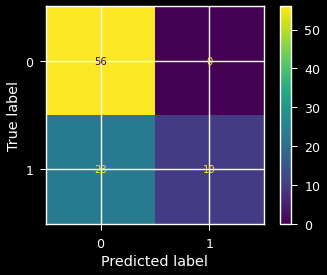

In [60]:
print(confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)